### linear regression

In [1]:
import numpy as np

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [25]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

(0, 15)

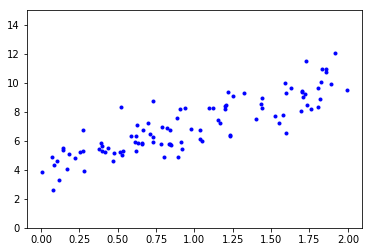

In [10]:
plt.plot(X, y, 'b.')
plt.ylim([0,15])

Calculating Theta Hat (value of hteta that minmizes cost function)

In [11]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [12]:
theta_best

array([[4.12551146],
       [3.0024433 ]])

In [16]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.12551146],
       [10.13039806]])

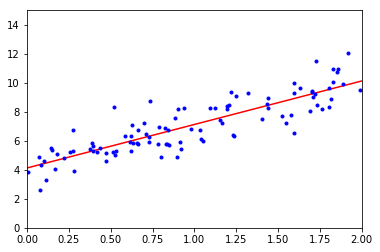

In [27]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Using SciKit Learn's module

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.12551146]), array([[3.0024433]]))

In [30]:
lin_reg.predict(X_new)

array([[ 4.12551146],
       [10.13039806]])